# Metropolis Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from progressbar import progressbar

## Target Distribution

Assume that $p(x) = \frac{f(x)}{NC}$, where $NC = \int_{- \infty}^{\infty} f(x) dx$. Let 
$$ f(x)=   \left\{
\begin{array}{ll}
      e^{\frac{1-x}{2}} + e^{-(x-1)^2} & x \geq 1 \\
      e^{\frac{x-1}{3}} + e^{(x-1)^3} & x < 1 \\
\end{array} 
\right.  $$
and $NC = 6.77921$(from wolfram alpha)
$$E[x]_{ x \sim p(x)} = \frac{E[x]_{x \sim f(x)}}{NC} = \frac{1.82783}{NC} = 0.26962$$


In [2]:
NC = 6.77921
TRUE_EXP = 0.26962

def f(x):
    if x >= 1:
        return np.exp((1-x)/2) + np.exp(-(x-1)**2)
    else:
        return np.exp((x-1)/3) + np.exp((x-1)**3)

## Draw $f(x)$ and $p(x)$

Text(0, 0.5, 'Density')

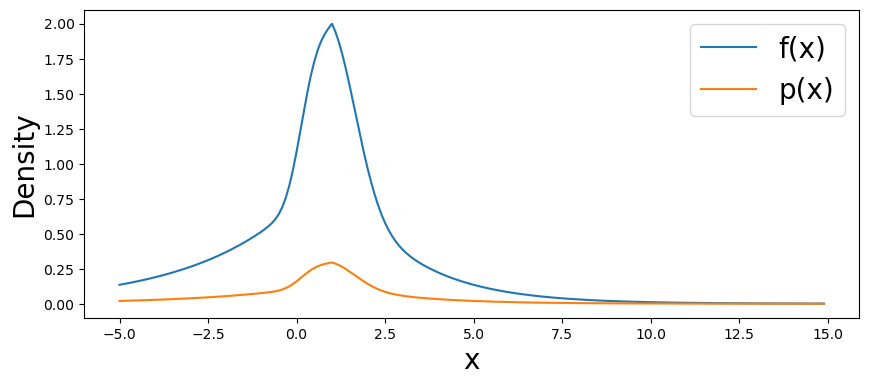

In [3]:
x_vals = np.arange(-5,15,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [d/NC for d in f_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)

## Let the Candidate function be $N(x_{prev}, 4)$

Since $N(x_{prev}, 4)$ is symmetric, we do not need to care about $\frac{g(a|b)}{g(b|a)}$. $a$ is the current sample, and $b$ is the sample candidate.

In [4]:
samples = [1]
N = 1000000

for _ in progressbar( range(N) ):
    prev_sample = samples[-1]
    candidate = np.random.normal(prev_sample, 4)
    accept_prob = min([1, f(candidate) / f(prev_sample)])
    if np.random.random() < accept_prob:
        samples.append(candidate)
    else:
        samples.append(prev_sample)

100% (1000000 of 1000000) |##############| Elapsed Time: 0:00:03 Time:  0:00:03


In [5]:
# remove burn in samples

burnin = 1000
remove_burnin_samples = samples[burnin:]

In [6]:
print(f"Sampling Mean = {np.mean(remove_burnin_samples)}")
print(f"True Mean = {TRUE_EXP}")

Sampling Mean = 0.27659370837807107
True Mean = 0.26962


Text(0.5, 1.0, 'Sampling Histogram and p(x)')

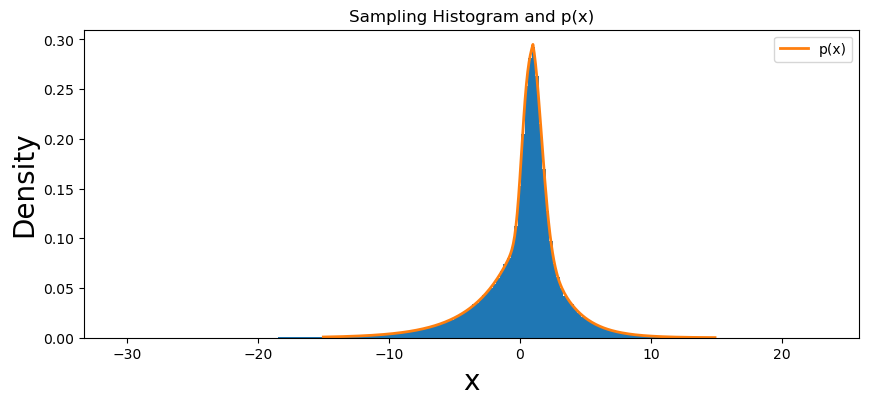

In [7]:
x_vals = np.arange(-15,15,.1)
p_vals = [f(d)/NC for d in x_vals]

plt.figure(figsize=(10,4))
plt.hist(remove_burnin_samples, bins=200, density=True)
plt.plot(x_vals, p_vals, linewidth=2)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(["p(x)"])
plt.title("Sampling Histogram and p(x)")

## Show the correlation of adjacent samples

Text(0.5, 1.0, 'Correlation: 0.81')

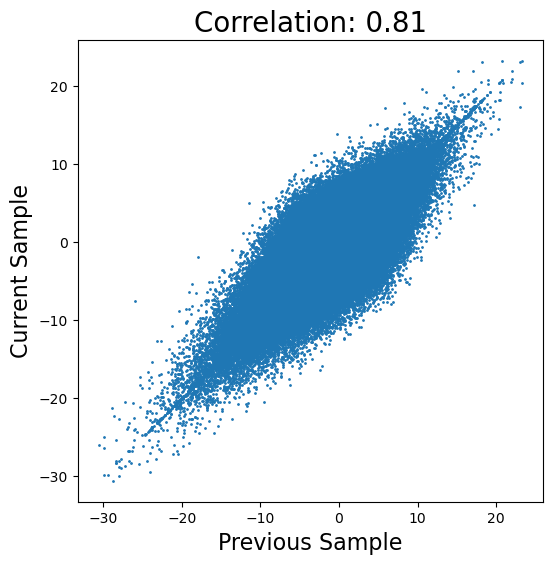

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(remove_burnin_samples[:-1], remove_burnin_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(pearsonr(remove_burnin_samples[:-1], remove_burnin_samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)